In [17]:
# imports and setup
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('precision', 4)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format)
plt.style.use('seaborn')
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# 3.6.2 Simple Linear Regression

In [18]:
boston = pd.read_csv('data/Boston.csv', index_col=0)

In [19]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


In [43]:
from sklearn import linear_model
from sklearn.metrics import (mean_squared_error, explained_variance_score, 
                             r2_score)
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif


In [25]:
lin_reg = linear_model.LinearRegression(fit_intercept=True)
x_train = boston[['lstat']]
y_train = boston['medv']
lin_reg.fit(x_train, y_train)

lin_reg.intercept_, lin_reg.coef_

(34.5538408793831, array([-0.95004935]))

In [29]:
y_pred = lin_reg.predict(boston[['lstat']])
r2 = r2_score(y_train, y_pred)
exl_var = explained_variance_score(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
print(f'R2: {r2}')
print(f'exl_var: {exl_var}')
print(f'mse: {mse}')



R2: 0.5441462975864797
exl_var: 0.5441462975864798
mse: 38.48296722989415


## Stats models

In [33]:
ols_sm = sm.OLS(y_train, sm.add_constant(x_train))


In [35]:
results = ols_sm.fit()

In [36]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           5.08e-88
Time:                        22:10:40   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.543    
Dependent Variable: medv             AIC:                3286.9750
Date:               2018-07-11 22:14 BIC:                3295.4280
No. Observations:   506              Log-Likelihood:     -1641.5  
Df Model:           1                F-statistic:        601.6    
Df Residuals:       504              Prob (F-statistic): 5.08e-88 
R-squared:          0.544            Scale:              38.636   
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const     34.5538     0.5626    61.4151   0.0000   33.4485   35.6592
lstat     -0.9500     0.0387   -24.5279   0.0000   -1.0261   -0.8740
------------------------------------------------------------------
Omnibus:             137.043       Durbin-Watson:          0.892  
Prob(Omnibus):       0.000         Jarque-Bera (JB):       291.373
Skew:                1.453         Prob(JB):               0.000  
Kurtosis:            5.319         Condition No.:          30     
==================================================================

"""

In [41]:
results.predict(sm.add_constant([1,10,100]))

array([ 33.60379153,  25.05334734, -60.4510945 ])

In [47]:
y_pred = results.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(results)

pred_dict = OrderedDict({'x_train': x_train['lstat'],
                         'y_pred': y_pred, 
                         'y_true': y_train, 
                         'lwr': iv_l, 
                         'upr': iv_u, 
                         'pred_se': prstd})

pd.DataFrame(pred_dict)

,x_train,y_pred,y_true,lwr,upr,pred_se
1,4.98,29.82,24.00,17.58,42.06,6.23
2,9.14,25.87,21.60,13.64,38.10,6.22
3,4.03,30.73,34.70,18.48,42.97,6.23
4,2.94,31.76,33.40,19.51,44.01,6.23
5,5.33,29.49,36.20,17.25,41.73,6.23
...,...,...,...,...,...,...
502,9.67,25.37,22.40,13.14,37.59,6.22
503,9.08,25.93,20.60,13.70,38.15,6.22
504,5.64,29.20,23.90,16.96,41.43,6.23
505,6.48,28.40,22.00,16.16,40.63,6.23


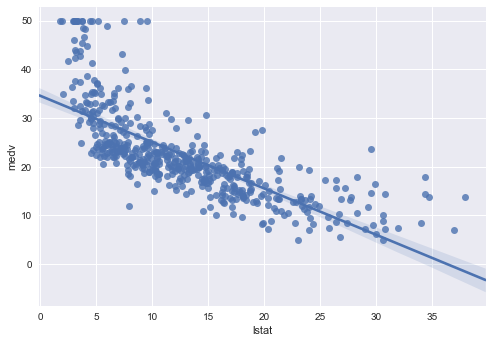

In [48]:
sns.regplot('lstat', 'medv', data=boston);


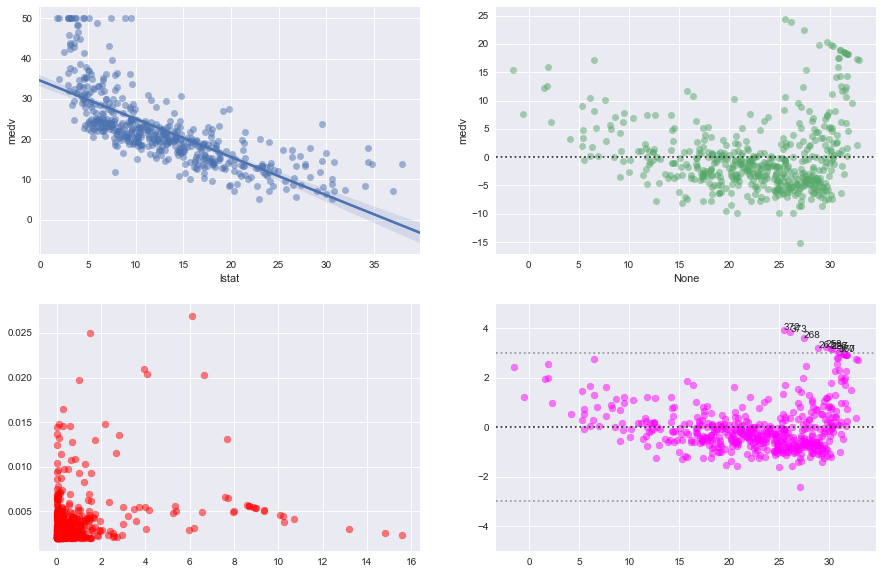

In [50]:
from statsmodels.graphics.regressionplots import *

ols_sm_resid = results.resid # residuals
ols_sm_resid_stud = ols_sm_resid / prstd # studentized residuals

f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)

sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 0], scatter_kws={'alpha': '0.5'}) # regression plot
sns.residplot(y_pred, 'medv', data=boston, ax=axes[0, 1], scatter_kws={'alpha': '0.5'}) # residual plot

# custom leverage plot instead of above
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import zscore
norm_resid = zscore(ols_sm_resid)
leverage = OLSInfluence(results).hat_matrix_diag
axes[1, 0].autoscale(enable=True, axis='y', tight=True)
axes[1, 0].scatter(norm_resid ** 2, leverage, alpha=0.5, color='red')

# studentized residual plot
axes[1, 1].scatter(y_pred, ols_sm_resid_stud, alpha=0.5, color='magenta')
axes[1, 1].axhline(0, ls=":", c=".2")
axes[1, 1].axhline(-3, ls=":", c=".6")
axes[1, 1].axhline(3, ls=":", c=".6")
axes[1, 1].set_ylim(-5, 5)

x = y_pred[np.logical_or(ols_sm_resid_stud > 3, ols_sm_resid_stud < -3)]
y = ols_sm_resid_stud[np.logical_or(ols_sm_resid_stud > 3, ols_sm_resid_stud < -3)]

for i, x, y in zip(x.index, x, y):
    axes[1, 1].annotate(i, xy=(x, y));

# 3.6.3 Multiple Linear Regression

In [54]:
x_train = boston[['lstat', 'age']]
y_train = boston['medv']
ols_sm = sm.OLS(y_train, sm.add_constant(x_train))
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Wed, 11 Jul 2018   Prob (F-statistic):           2.98e-88
Time:                        22:23:16   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
boston_exog = sm.add_constant(boston.drop('medv', axis=1))


In [56]:
boston_exog.columns

Index(['const', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat'],
      dtype='object')

In [57]:
ols_smf = smf.ols(formula=ols_formula(boston, 'medv', 'age'), data=boston)


NameError: name 'smf' is not defined

In [59]:
import statsmodels.formula.api as smf # R-style formula api
ols_smf = smf.ols(formula='medv ~ lstat + age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           2.98e-88
Time:                        00:25:09   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
def ols_formula(df, dependent_var, *excluded_cols):
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)

ols_smf = smf.ols(formula=ols_formula(boston, 'medv'), data=boston)

ols_smf_results = ols_smf.fit()
ols_smf_results.summary()
ols_smf = smf.ols(formula=ols_formula(boston, 'medv', 'age'), data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     117.3
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          6.08e-136
Time:                        00:27:08   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3024.
Df Residuals:                     493   BIC:                             3079.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4369      5.080      7.172      0.000      26.456      46.418
crim          -0.1080      0.033     -3.290      0.001      -0.173      -0.043
zn             0.0463      0.014      3.404      0.001       0.020       0.073
indus          0.0206      0.061      0.335      0.738      -0.100       0.141
chas           2.6890      0.860      3.128      0.002       1.000       4.378
nox          -17.7135      3.679     -4.814      0.000     -24.943     -10.484
rm             3.8144      0.408      9.338      0.000       3.012       4.617
dis           -1.4786      0.191     -7.757      0.000      -1.853      -1.104
rad            0.3058      0.066      4.627      0.000       0.176       0.436
tax           -0.0123      0.004     -3.283      0.001      -0.020      -0.005
ptratio       -0.9522      0.130     -7.308      0.000      -1.208      -0.696
black          0.0093      0.003      3.481      0.001       0.004       0.015
lstat         -0.5239      0.048    -10.999      0.000      -0.617      -0.430
==============================================================================
Omnibus:                      178.343   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              786.386
Skew:                           1.523   Prob(JB):                    1.73e-171
Kurtosis:                       8.294   Cond. No.                     1.48e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.4 Interaction Terms

In [65]:
ols_smf = smf.ols(formula='medv ~ lstat * age', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           4.86e-88
Time:                        00:28:54   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 3.6.5 Non-linear Transformations of Predictors

In [67]:
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston)
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          1.56e-112
Time:                        00:29:39   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
ols_smf = smf.ols(formula='medv ~ lstat', data=boston).fit()
ols_smf2 = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=boston).fit()

sm.stats.anova_lm(ols_smf, ols_smf2)

/Users/nick/.virtualenvs/statistical_learning/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/nick/.virtualenvs/statistical_learning/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/nick/.virtualenvs/statistical_learning/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.00,"19,472.38",0.00,nan,nan,nan
1,503.00,"15,347.24",1.00,"4,125.14",135.20,0.00


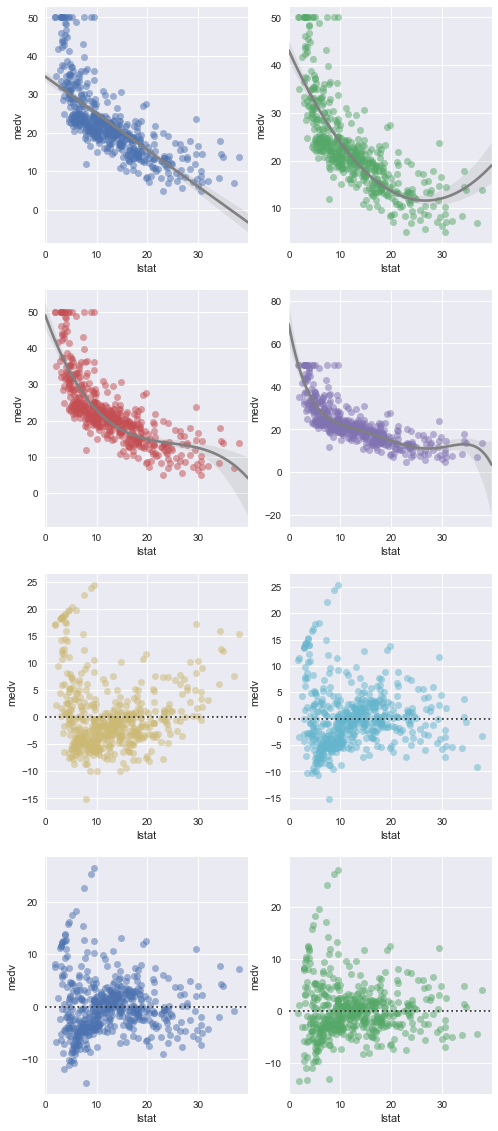

In [69]:
f, axes = plt.subplots(4, 2, sharex=False, sharey=False)
f.set_figheight(20)

sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.regplot('lstat', 'medv', data=boston, ax=axes[0, 1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.regplot('lstat', 'medv', data=boston, ax=axes[1, 0], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.regplot('lstat', 'medv', data=boston, ax=axes[1, 1], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', data=boston, ax=axes[2, 0], order=1, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', data=boston, ax=axes[2, 1], order=2, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', data=boston, ax=axes[3, 0], order=3, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'})
sns.residplot('lstat', 'medv', data=boston, ax=axes[3, 1], order=5, line_kws={'color': 'gray'}, scatter_kws={'alpha': '0.5'});

In [70]:
ols_smf = smf.ols(formula='medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5)',
                  data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          8.73e-122
Time:                        00:35:31   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
lstat           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(lstat ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(lstat ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(lstat ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(lstat ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [72]:
ols_smf = smf.ols(formula='medv ~ np.log(rm)', data=boston)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           1.22e-64
Time:                        00:35:49   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

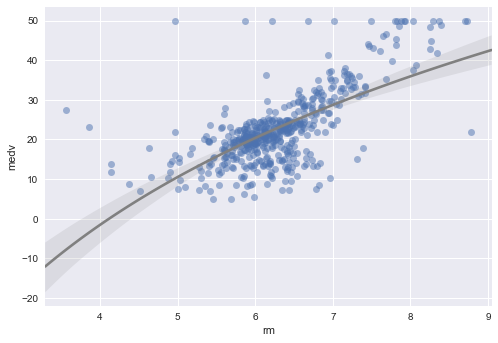

In [73]:
sns.regplot('rm', 
            'medv', 
            data=boston, 
            logx=True, 
            line_kws={'color': 'gray'}, 
            scatter_kws={'alpha': '0.5'});

In [75]:
carseats = pd.read_csv('data/Carseats.csv', index_col=0)
carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
396,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
397,6.14,139,23,3,37,120,Medium,55,11,No,Yes
398,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
399,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [76]:
form = ols_formula(carseats, 'Sales', 'ShelveLoc') + ' + Income:Advertising + Price:Age + C(ShelveLoc)'
ols_smf = smf.ols(formula=form, data=carseats)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     210.0
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          6.14e-166
Time:                        00:36:36   Log-Likelihood:                -564.67
No. Observations:                 400   AIC:                             1157.
Df Residuals:                     386   BIC:                             1213.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  6.5756      1.009      6.519      0.000       4.592       8.559
Urban[T.Yes]               0.1402      0.112      1.247      0.213      -0.081       0.361
US[T.Yes]                 -0.1576      0.149     -1.058      0.291      -0.450       0.135
C(ShelveLoc)[T.Good]       4.8487      0.153     31.724      0.000       4.548       5.149
C(ShelveLoc)[T.Medium]     1.9533      0.126     15.531      0.000       1.706       2.201
CompPrice                  0.0929      0.004     22.567      0.000       0.085       0.101
Income                     0.0109      0.003      4.183      0.000       0.006       0.016
Advertising                0.0702      0.023      3.107      0.002       0.026       0.115
Population                 0.0002      0.000      0.433      0.665      -0.001       0.001
Price                     -0.1008      0.007    -13.549      0.000      -0.115      -0.086
Age                       -0.0579      0.016     -3.633      0.000      -0.089      -0.027
Education                 -0.0209      0.020     -1.063      0.288      -0.059       0.018
Income:Advertising         0.0008      0.000      2.698      0.007       0.000       0.001
Price:Age                  0.0001      0.000      0.801      0.424      -0.000       0.000
==============================================================================
Omnibus:                        1.281   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.527   Jarque-Bera (JB):                1.147
Skew:                           0.129   Prob(JB):                        0.564
Kurtosis:                       3.050   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
from patsy.contrasts import Treatment

Treatment(reference=0).code_without_intercept(list(carseats['ShelveLoc'].unique())).matrix

array([[0., 0.],
       [1., 0.],
       [0., 1.]])